<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD22_Deep_Network_what_is_difference%3F(220811).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22-2. ImageNet Challenge

- Top-1 Accuracy : 일반적인 정확도

- Top-5 Accuracy :  모델 5개의 가장 높은 확률 답변이 예상 답변과 일치해야 함을 의미

# 22-3. 딥네트워크의 시작

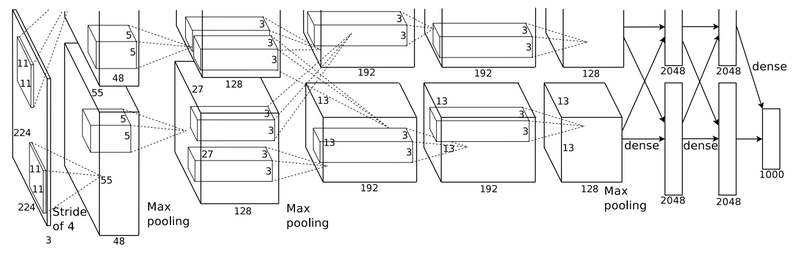

# 22-4. CNN을 잘쓰자

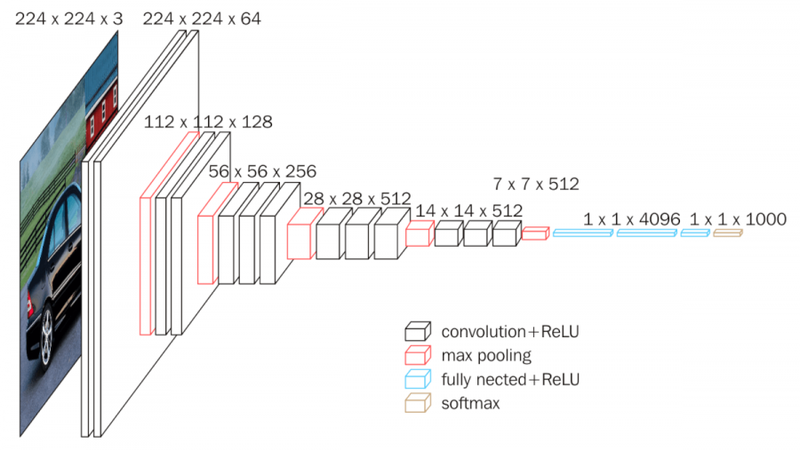

# VGG

- layer 개수 : 16

- 커널 크기 : 3*3

# 22-5. 멀리 있으면 잘 안 들려요

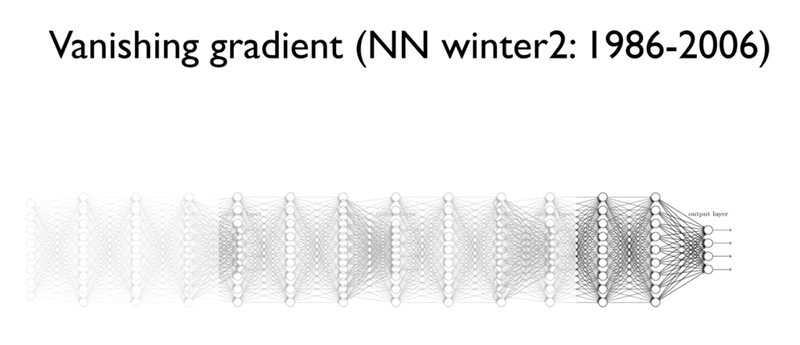



# 기울기 소실

[기울기 소실 참고 링크](http://cbjsena.blogspot.com/2018/12/blog-post_25.html)

[기울기 소실 설명 유튜브 링크](https://www.youtube.com/watch?v=qhXZsFVxGKo&feature=emb_logo)

- 기울기 소실이란? 모델이 깊어질수록 기울기가 매우 작아져서 레이어를 학습시키기 위해 충분한 값을 표현하지 못할 경우를 말한다.

- 기울기 소실을 해결하는 방법

(1) 활성화 함수 사용 : tanh(x), Relu

(2) 가중치 초기화

# 22-6. 지름길을 만들어주자

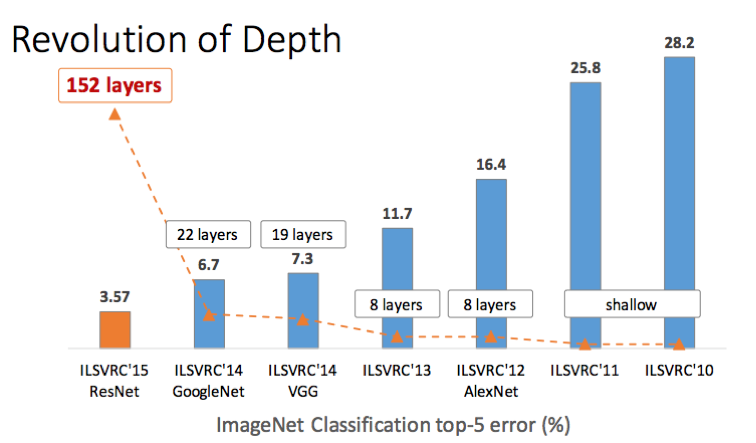

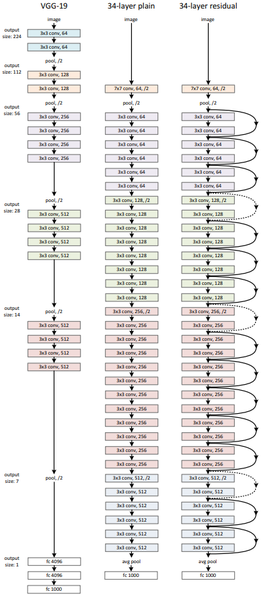

In [ ]:
#  ResNet에서는 Residual Model에서 보이는 것처럼 Skip Connection이라는 구조를 사용해서 Vanishing Gradient 문제를 해결

# 22-7. 딥네트워크 속속들이

- 그림과 글로만 보던 딥네트워크 어떻게 만들고 있는지 알아봅니다.

- 논문의 방법이 사용된 부분을 코드에서 찾을 수 있습니다.

- 나도 할 수 있다는 자신감을 챙깁니다.

# 22-8. Model API

#### Tensorflow
- 사전학습 모델(pre-trained model)들은 slim이라는 고수준 API로 구현

#### Keras


# 22-9. VGG-16

In [ ]:
# VGG-16 코드 구현

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CIFAR100 데이터셋을 가져옵시다. 
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

169017344/169001437 [==============================] - 2s 0us/step
x_train: 50000 x_test: 10000


In [ ]:
img_input = keras.Input(shape=(32,32,3))

x = keras.layers.Conv2D(16, 3, activation='relu')(img_input)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Conv2D(32, 3, activation='relu')(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

# 325,956개의 파라미터 생성

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

In [ ]:
# 모델 학습

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train)

1563/1563 [==============================] - 52s 33ms/step - loss: 3.6017 - accuracy: 0.1596


In [ ]:
# VGG 첫 번째 블록(첫 번째 Max pooling까지)

# 첫 번째 블록(예시)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

print('첫 번째 블록 OK!!')

첫 번째 블록 OK!!


In [ ]:
# 두 번째 블록

x = layers.Conv2D(128, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block2conv1')(x)
x = layers.Conv2D(128, (3, 3), 
                  activation='relu', 
                  padding='same', 
                  name='block2conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

In [ ]:
# 세 번째 블록

x = layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1')(x)
x = layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2')(x)
x = layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

In [ ]:
# 네 번째 블록
x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

In [ ]:
# 다섯 번째 블록
x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1')(x)
x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2')(x)
x = layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

In [ ]:
# 여섯 번째 블록
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)

classes=100
x = layers.Dense(classes, activation='softmax', name='predictions')(x)    
# CIFAR100을 위한 모델 Output

In [ ]:
# 모델 출력
model = keras.Model(name="VGG-16", inputs=img_input, outputs=x)

model.summary()

Model: "VGG-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2conv1 (Conv2D)        (None, 16, 16, 128)       73856     
                                                                 
 block2conv2 (Conv2D)        (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0    

# 22-10. ResNet-50

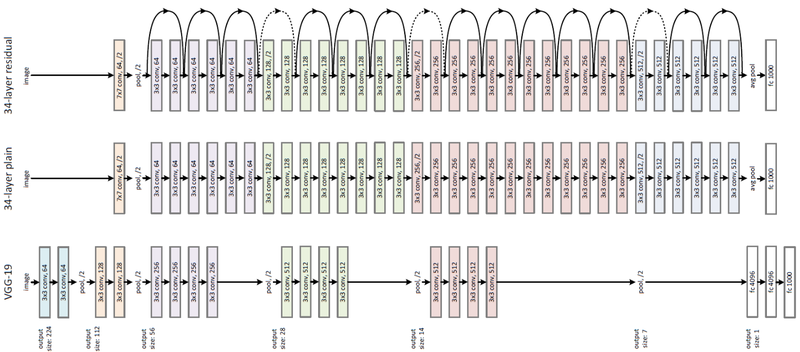